# Part A

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_excel('Sales_Data.xlsx')

In [232]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [233]:
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [234]:
df.shape

(2747, 20)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [236]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

print(df['ORDERDATE'].dtype)

datetime64[ns]


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [238]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("Categorical columns:",cat) 
print("Numeric columns:",num)


Categorical columns: ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
Numeric columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'MSRP']


In [239]:
df_num = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER','MSRP']]
df_cat = df[['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']]

In [240]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [241]:
df_cat.describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
COUNTRY,2747,19,USA,928
DEALSIZE,2747,3,Medium,1349


In [242]:
skewness = df_num.skew()
print("Skewness of variables:")
print(skewness)

Skewness of variables:
QUANTITYORDERED         0.369286
PRICEEACH               0.697222
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
dtype: float64


In [243]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [244]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

STATUS :  6
STATUS
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: count, dtype: int64


PRODUCTLINE :  7
PRODUCTLINE
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: count, dtype: int64


PRODUCTCODE :  109
PRODUCTCODE
S24_3969    21
S18_2248    21
S18_4409    21
S18_1749    21
S24_2887    22
            ..
S24_1444    28
S24_2840    28
S50_1392    28
S32_2509    28
S18_3232    51
Name: count, Length: 109, dtype: int64


CUSTOMERNAME :  89
CUSTOMERNAME
Boards & Toys Co.                 3
Atelier graphique                 7
Royale Belge                      8
Auto-Moto Classics Inc.           8
Microscale Inc.                  10
                               ... 
AV Stores, Co.                   51
La Rochelle Gifts                53
Australian Collectors, Co.       55
Mini Gifts Distributo

C:\Users\prapthi.pandian\AppData\Local\Temp\ipykernel_32552\46284875.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0])
C:\Users\prapthi.pandian\AppData\Local\Temp\ipykernel_32552\46284875.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  a = sns.distplot(df['PRI

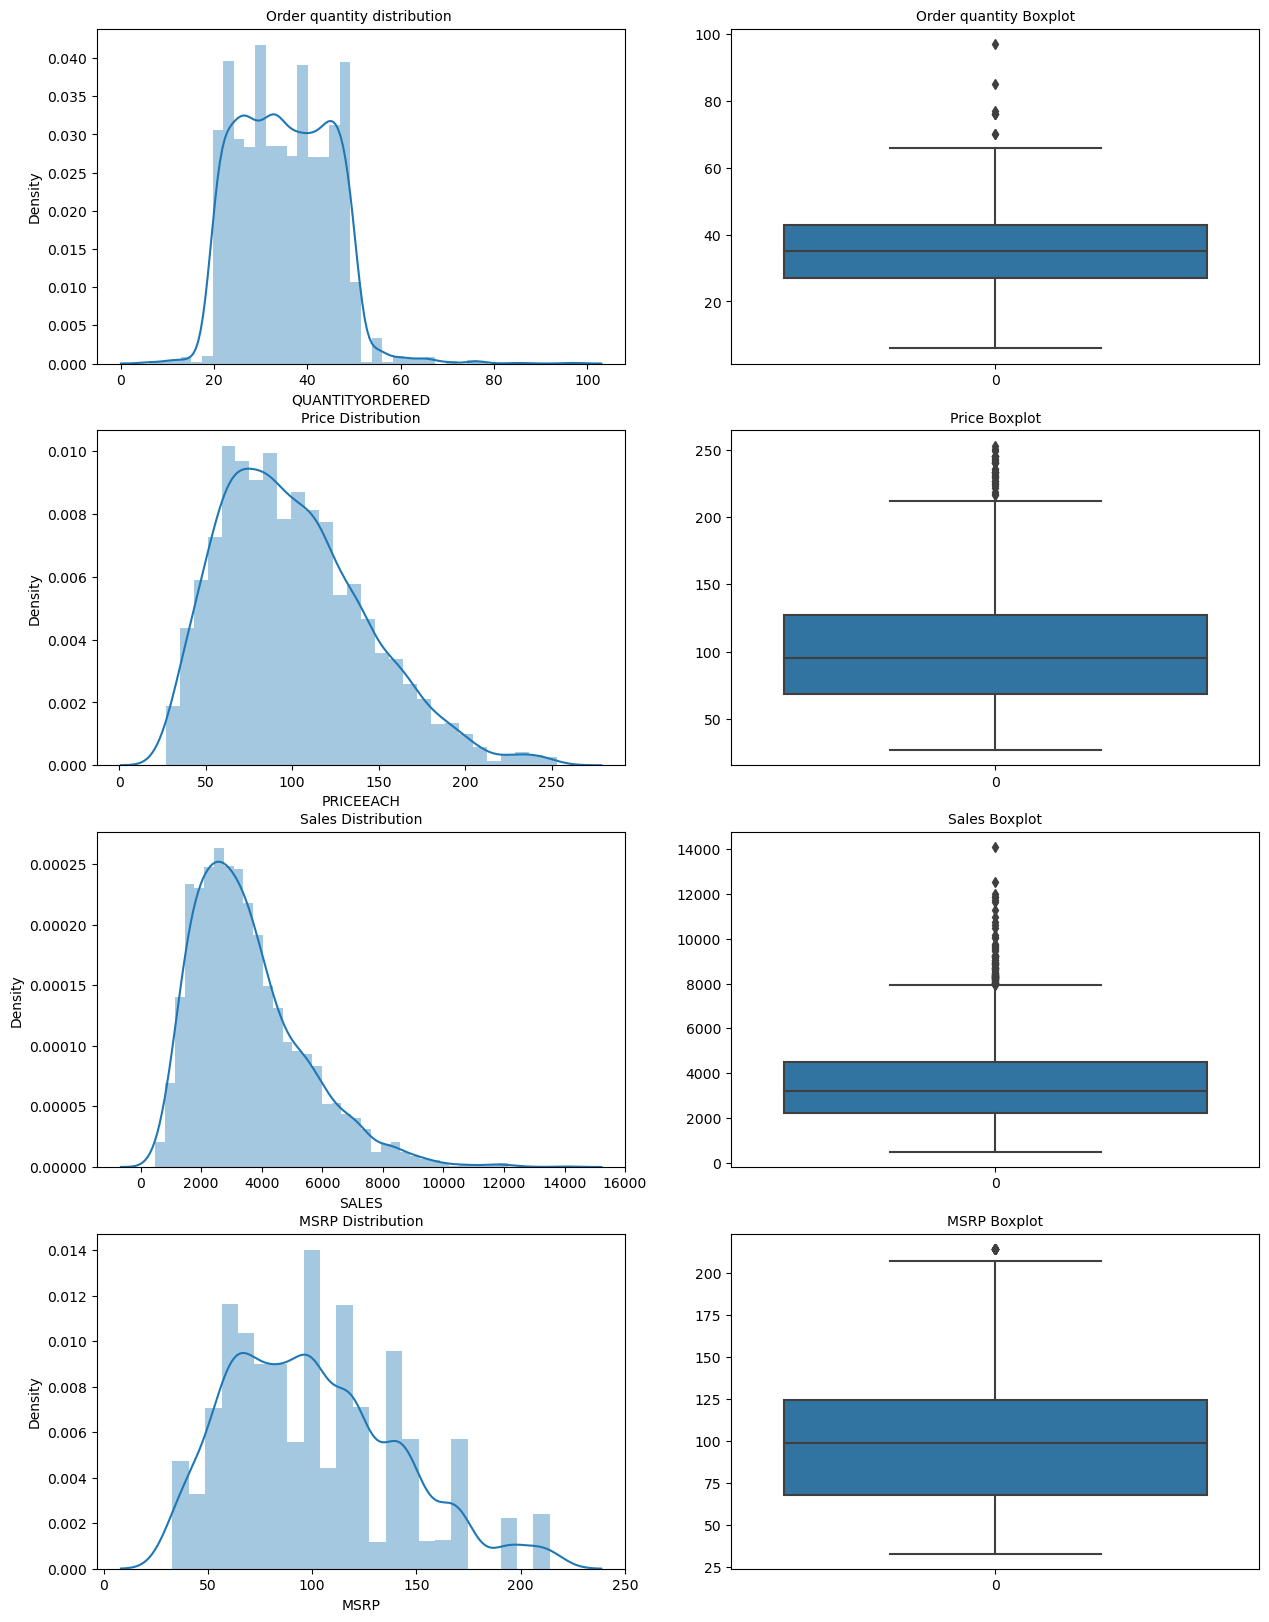

In [245]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,20)

a = sns.distplot(df['QUANTITYORDERED'] , ax=axes[0][0])
a.set_title("Order quantity distribution ",fontsize=10)
a = sns.boxplot(df['QUANTITYORDERED'] , orient = "v" , ax=axes[0][1])
a.set_title("Order quantity Boxplot",fontsize=10)

a = sns.distplot(df['PRICEEACH'] , ax=axes[1][0])
a.set_title("Price Distribution",fontsize=10)
a = sns.boxplot(df['PRICEEACH'] , orient = "v" , ax=axes[1][1])
a.set_title("Price Boxplot",fontsize=10)

a = sns.distplot(df['SALES'] , ax=axes[2][0])
a.set_title("Sales Distribution",fontsize=10)
a = sns.boxplot(df['SALES'] , orient = "v" , ax=axes[2][1])
a.set_title("Sales Boxplot",fontsize=10)

a = sns.distplot(df['MSRP'] , ax=axes[3][0])
a.set_title("MSRP Distribution",fontsize=10)
a = sns.boxplot(df['MSRP'] , orient = "v" , ax=axes[3][1])
a.set_title("MSRP Boxplot",fontsize=10)

plt.show();

In [246]:
def univariateAnalysis_category(cat):
    print("Details of " + cat)
    print("----------------------------------------------------------------")
    print(df[cat].value_counts())
    plt.figure(figsize=(5,4))
    ax=df[cat].value_counts().plot.bar(title="Frequency Distribution of " + cat)
    ax.bar_label(ax.containers[0]);
    plt.show()
    print("       ")

Details of STATUS
----------------------------------------------------------------
STATUS
Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64


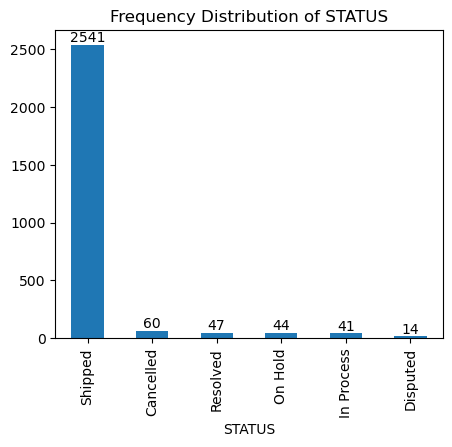

       
Details of PRODUCTLINE
----------------------------------------------------------------
PRODUCTLINE
Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: count, dtype: int64


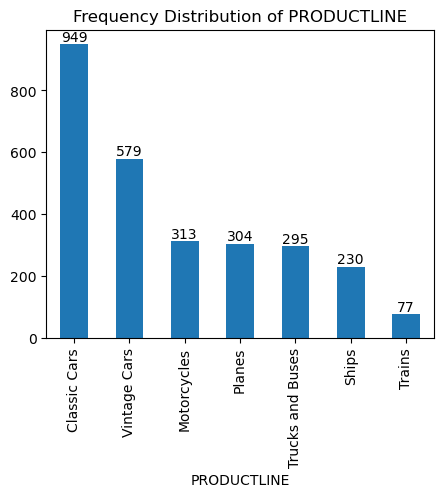

       
Details of COUNTRY
----------------------------------------------------------------
COUNTRY
USA            928
Spain          342
France         314
Australia      185
UK             144
Italy          113
Finland         92
Norway          85
Singapore       79
Canada          70
Denmark         63
Germany         62
Sweden          57
Austria         55
Japan           52
Belgium         33
Switzerland     31
Philippines     26
Ireland         16
Name: count, dtype: int64


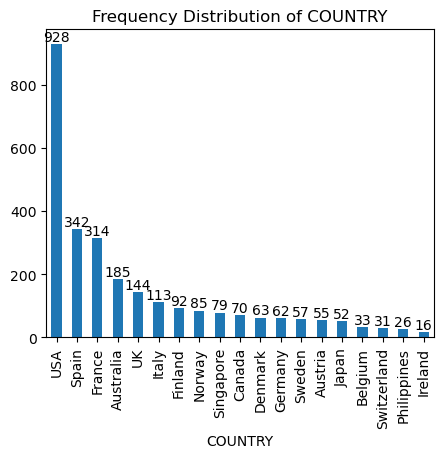

       
Details of DEALSIZE
----------------------------------------------------------------
DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64


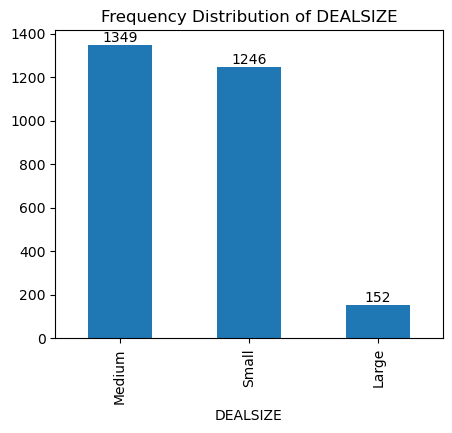

In [247]:
for x in df_cat:
    univariateAnalysis_category(x)

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


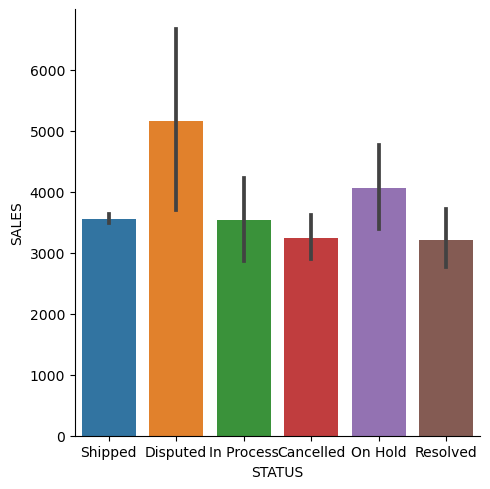

In [260]:
sns.catplot(df, x='STATUS', y='SALES', kind='bar');

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


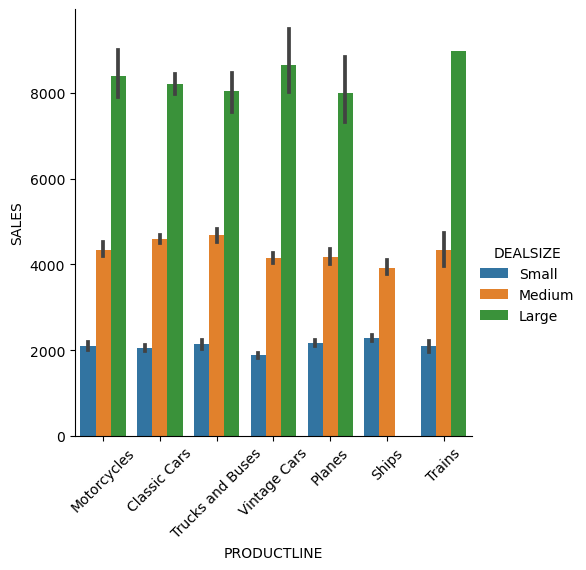

In [269]:
fig_dims=(12,8)
#fig=plt.subplots(figsize=fig_dims)
#plt.title('Sales - ProductLine- DealSize Plot')
#sns.boxplot(df, x='PRODUCTLINE', y='SALES', hue='DEALSIZE')
#plt.show();
ax=sns.catplot(df, x='PRODUCTLINE', y='SALES', hue='DEALSIZE', kind='bar')
ax.set_xticklabels(rotation=45)
plt.show();

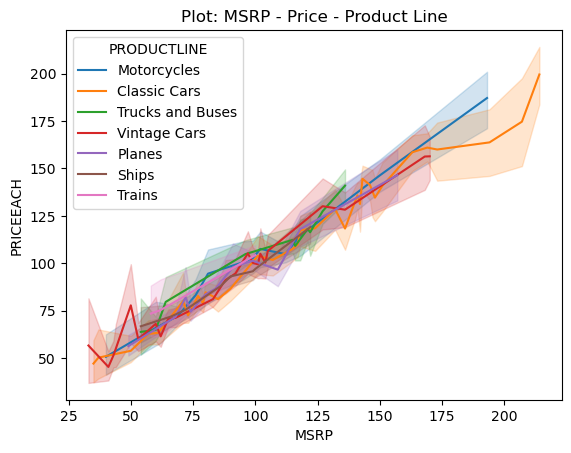

In [250]:
plt.title('Plot: MSRP - Price - Product Line')
sns.lineplot(df, x='MSRP', y='PRICEEACH', hue='PRODUCTLINE');

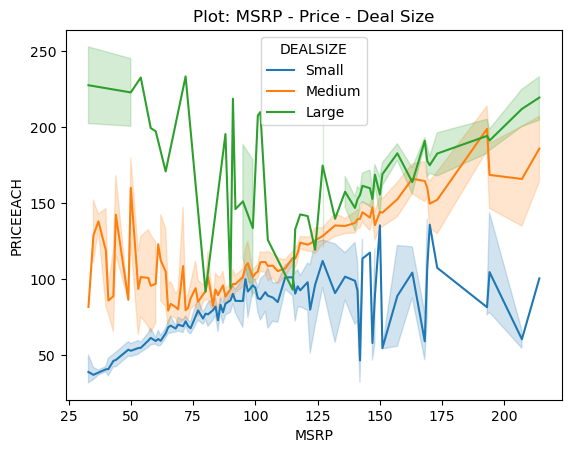

In [251]:
plt.title('Plot: MSRP - Price - Deal Size')
sns.lineplot(df, x='MSRP', y='PRICEEACH', hue='DEALSIZE');

C:\Users\prapthi.pandian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


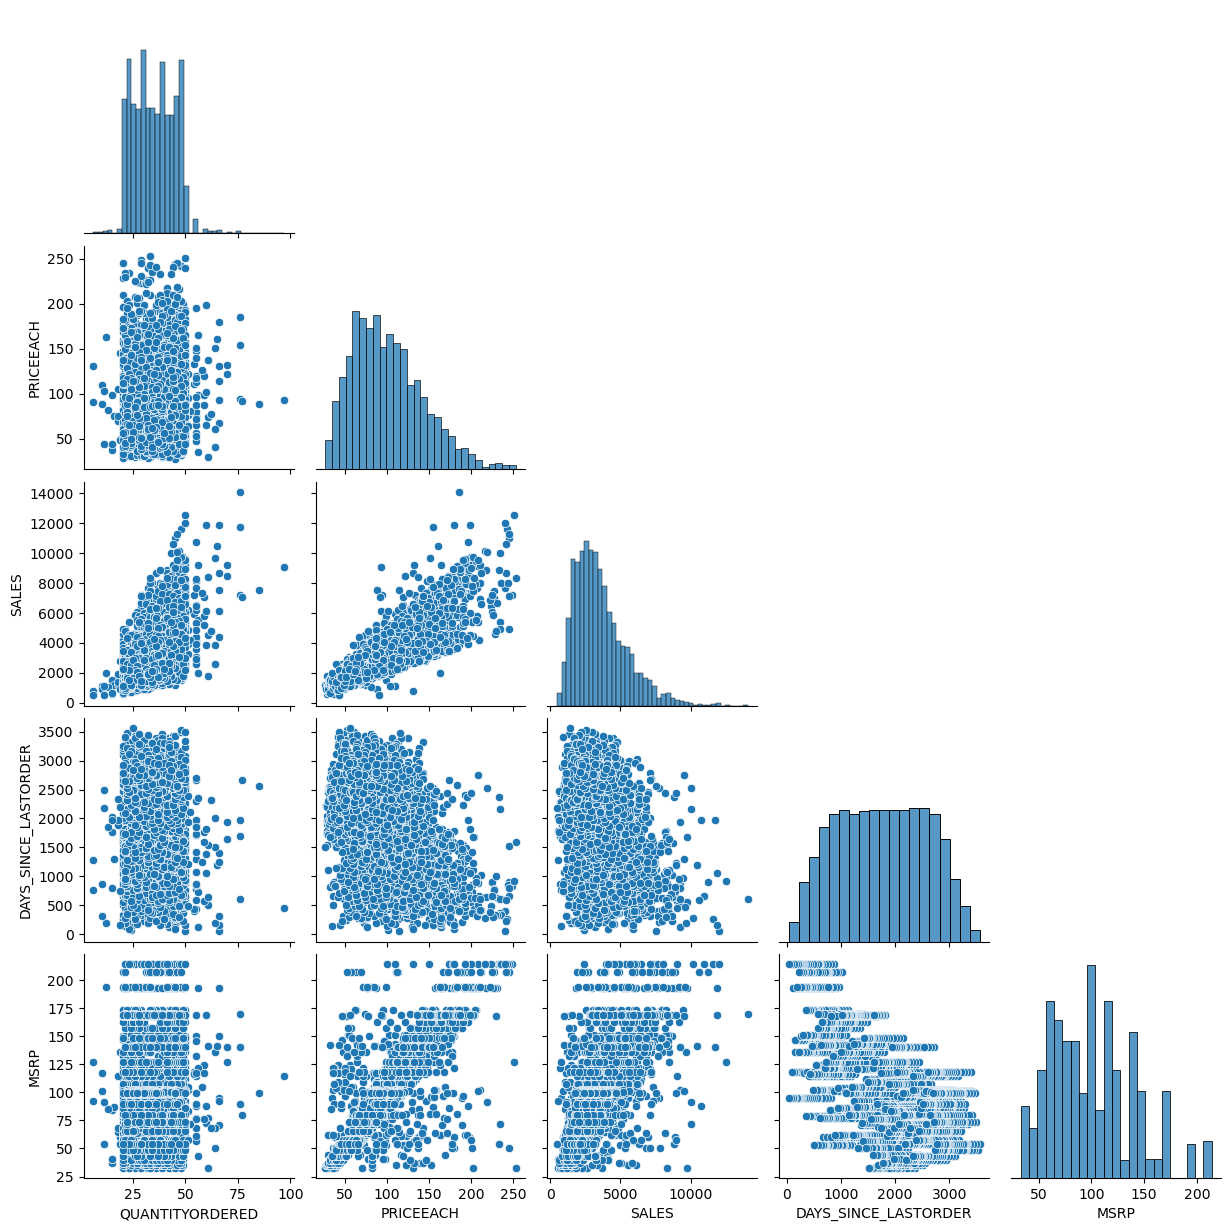

In [252]:
#df_num = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']]
sns.pairplot(df_num, corner= True);

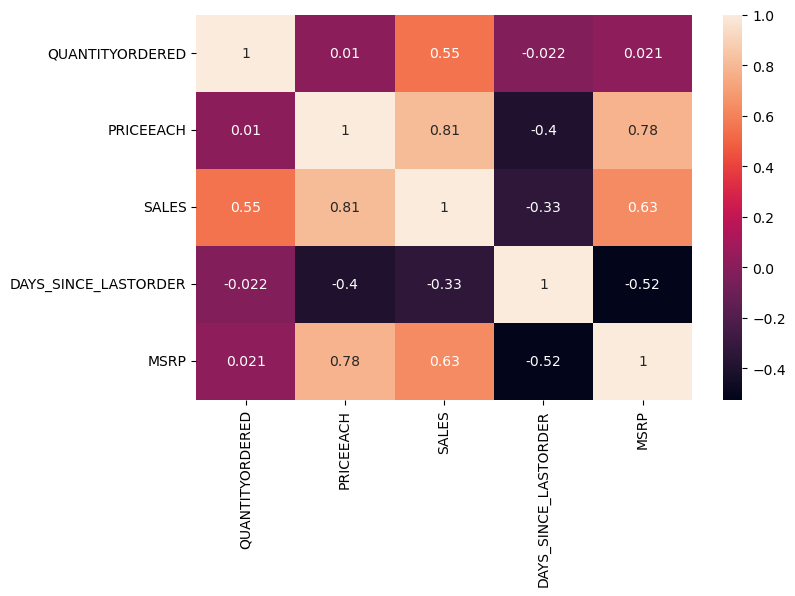

In [253]:
plt.figure(figsize=(8,5))
sns.heatmap(df_num.corr(),annot=True)
plt.show();

### Outliers treatment

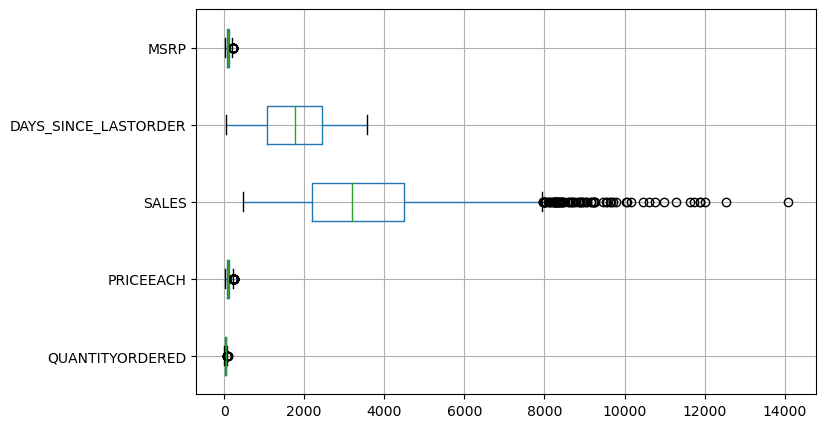

In [254]:
plt.figure(figsize=(8,5))
df_num.boxplot(vert=0)
plt.show();

# Part - B

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df = pd.read_csv('dataset_group.csv')

In [199]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [200]:
df.isna().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [201]:
df.shape

(20641, 3)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [203]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

print(df['Date'].dtype)

datetime64[ns]


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [205]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("Categorical columns:",cat) 
print("Numeric columns:",num)


Categorical columns: ['Product']
Numeric columns: ['Date', 'Order_id']


In [215]:
df_num = df[['Order_id']]
df_num.describe()

,Order_id
count,15911.000000
mean,574.150462
std,328.537425
min,1.000000
25%,289.500000
50%,579.000000
75%,859.000000
max,1139.000000


In [206]:
df[cat].describe()

,Product
count,20641
unique,37
top,poultry
freq,640


In [207]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 4730


,Date,Order_id,Product
10,2018-01-01,1,all- purpose
13,2018-01-01,1,all- purpose
18,2018-01-01,1,dinner rolls
29,2018-01-01,2,waffles
31,2018-01-01,2,hand soap
...,...,...,...
20616,2020-02-24,1137,paper towels
20632,2020-02-25,1138,sandwich bags
20633,2020-02-25,1138,toilet paper
20635,2020-02-25,1138,soda


In [208]:
df.drop_duplicates(inplace=True) 

In [209]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Date,Order_id,Product


In [210]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PRODUCT :  37
Product
hand soap                       394
sandwich loaves                 398
flour                           402
pork                            405
sugar                           411
paper towels                    413
butter                          419
sandwich bags                   419
shampoo                         420
tortillas                       421
fruits                          422
ketchup                         423
pasta                           423
spaghetti sauce                 425
beef                            427
all- purpose                    427
mixes                           428
individual meals                428
juice                           429
laundry detergent               431
toilet paper                    431
soap                            432
coffee/tea                      432
milk                            433
aluminum foil                   438
yogurt                          438
bagels                          439
dishwa

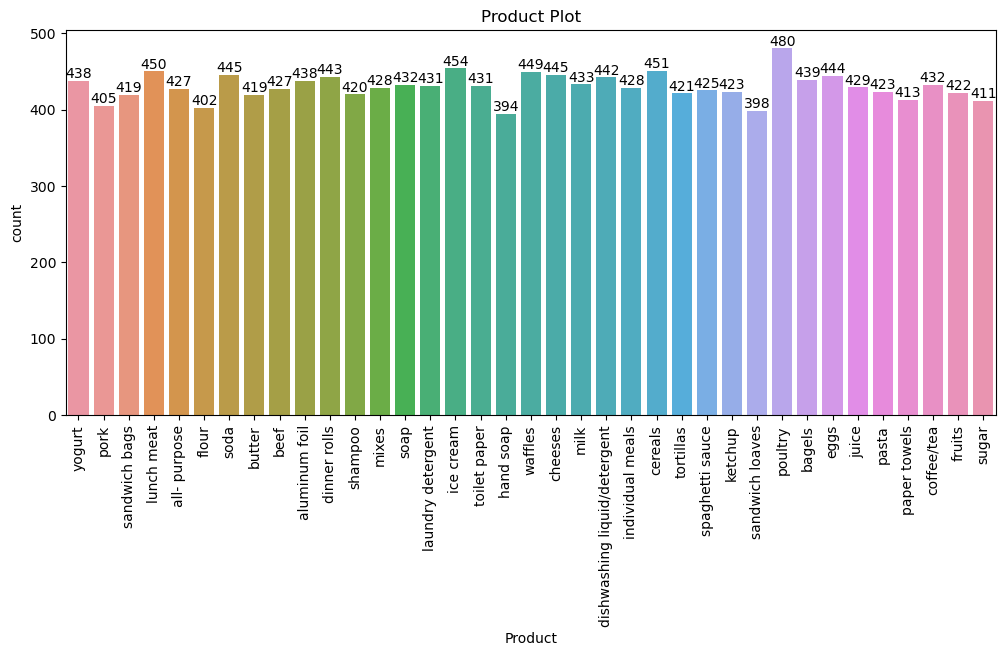

In [211]:
plt.figure(figsize= (12,5))
plt.title('Product Plot')
ax=sns.countplot(df,x='Product')
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);